In [235]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import enum
import re

In [392]:
functions = [i for i in dir(df) if 'dup' in i]
functions

['drop_duplicates', 'duplicated']

In [21]:
os.listdir('SalesAnalysis/Sales_Data')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

#### Merging all files in one DataFrame

In [30]:
# df = pd.read_csv('./SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files = [f for f in os.listdir('SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [27]:
all_months_data.to_csv("all_data.csv", index = False)

In [143]:
all_data = pd.read_csv("all_data.csv")

In [144]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning Data

#### Removing Nan values

In [145]:
all_data[all_data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
all_data.dropna(how = 'any', inplace = True) # 'any' if any value in the row is NaN, 'all' if all the values in row is Nan
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [153]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Correcting data types

In [154]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null object
Sales               185950 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.8+ MB


### Augmenting data with additional columns 

#### Adding Month

In [218]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
type(months)

list

In [222]:
all_data['Month no.'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month no.'].apply(lambda x : months[int(x) - 1])
all_data['Month no.'] = all_data['Month no.'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month no.
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,4


#### Adding Sales column

In [224]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month no.
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,4


#### Adding City column

In [306]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
4
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})") # Using f strings(Added in python 3.5). Normal get_city(x) + ' ' + get_state(x) can also be used. 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month no.,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,8.97,9,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,9,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,700.00,9,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,379.99,9,San Francisco (CA)


### Which month had the best sales

In [223]:
results = all_data.groupby('Month no.').sum()
# all_data.groupby('Month').sum().sort_values('Sales', ascending = False)
results

,Quantity Ordered,Price Each,Sales
Month no.,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


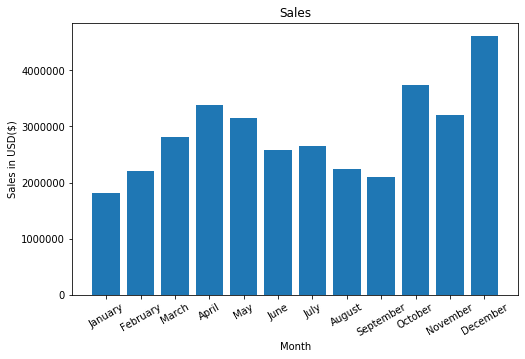

In [234]:
plt.figure(figsize = (8,5))
plt.bar(months,results['Sales'])
plt.xticks(rotation = 30)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.title('Sales')
plt.show()

#### Answer : December 

### Which city had the highest number of sales

In [313]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Month no.
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


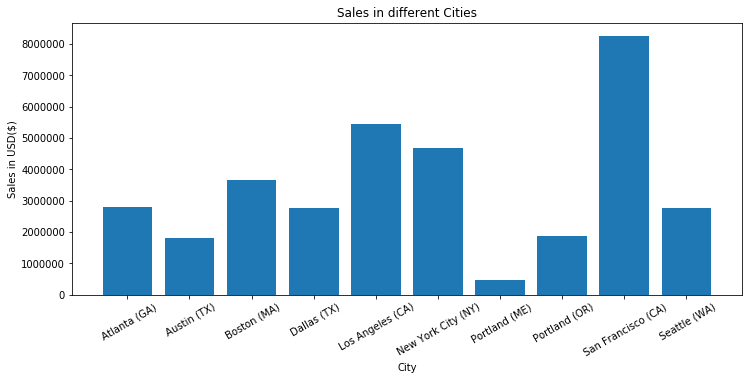

In [347]:
plt.figure(figsize = (12,5))
plt.bar(results.index,results['Sales'])
plt.xticks(rotation = 30)
plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.title('Sales in different Cities')
plt.show()

#### Answer : San Francisco

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [332]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [386]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month no.,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,4,Los Angeles (CA),9,27


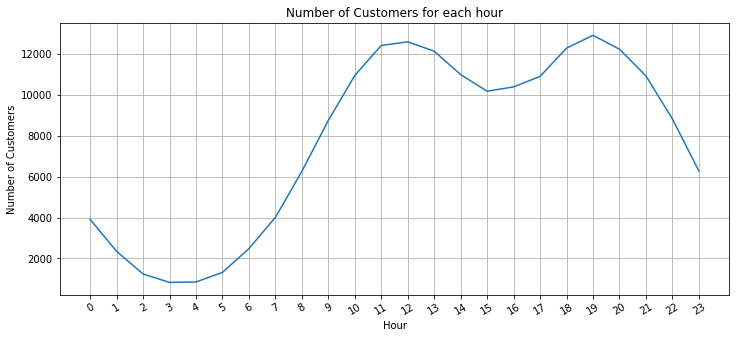

In [526]:
results = all_data.groupby('Hour').count()
plt.figure(figsize = (12,5))
plt.plot(results.index,results['Sales'])
plt.grid()
plt.xticks(results.index,rotation = 30)
plt.ylabel('Number of Customers')
plt.xlabel('Hour')
plt.title('Number of Customers for each hour')
plt.show()

#### Recommended time : 11 AM (11) to 7 pm (19)

### What products are most often sold together?

In [415]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
# df = df[['Order ID', 'Grouped']]

C:\Users\ridhima gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [416]:
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [436]:
from itertools import combinations
from collections import Counter

In [439]:
functions = [i for i in dir(Counter) if '__' not in i]
functions

['_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'update',
 'values']

In [443]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, values in count.most_common(20):
    print(key,values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

###  What product sold the most? Why do you think it sold the most?

In [532]:
results = all_data.groupby('Product').sum().sort_values('Quantity Ordered', ascending = False)
results

,Quantity Ordered,Price Each,Sales,Month no.,Hour,Minutes
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645,647586
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529,634442
Wired Headphones,20557,226395.18,246478.43,133397,271720,554023
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948
iPhone,6849,4789400.00,4794300.00,47941,98657,201688


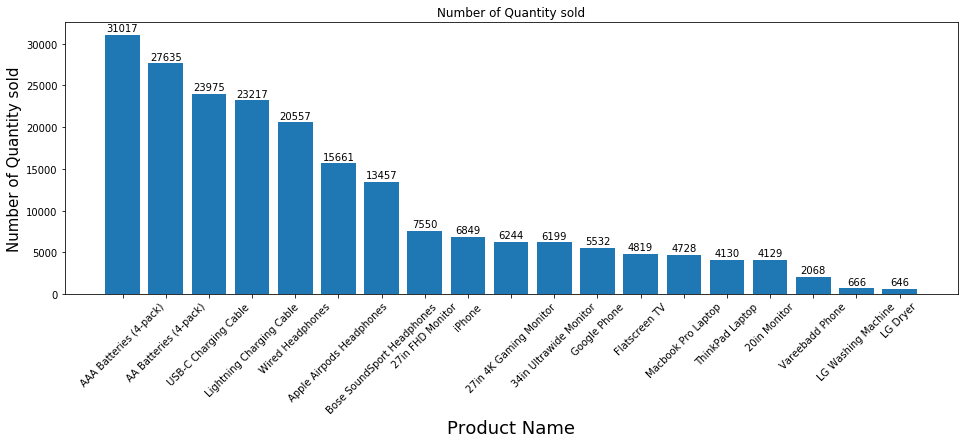

In [562]:
plt.figure(figsize = (16,5))
plt.bar(results.index,results['Quantity Ordered'])
plt.xticks(rotation = 45)
plt.ylabel('Number of Quantity sold',size = 15)
plt.xlabel('Product Name',size = 18)
plt.title('Number of Quantity sold')

for i,j in enumerate(results.index):
    plt.text(i, results['Quantity Ordered'].loc[j]+800, results['Quantity Ordered'].loc[j], horizontalalignment='center', verticalalignment='center')

plt.show()

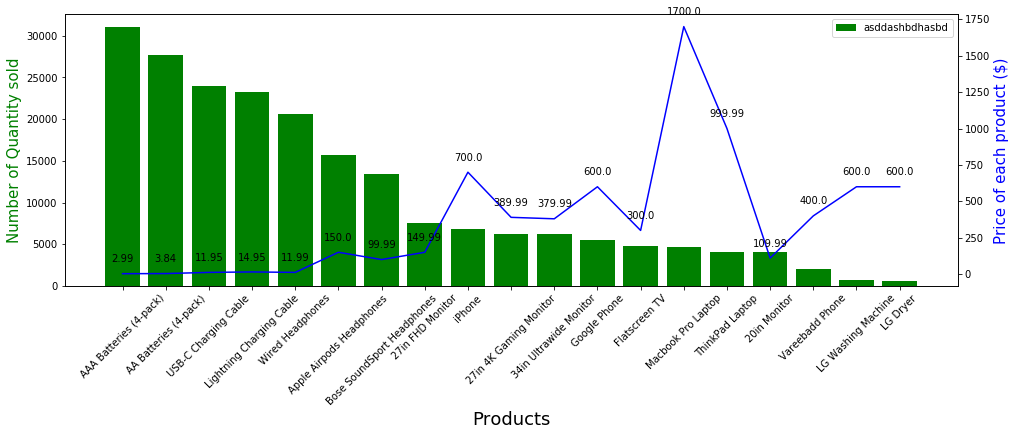

In [572]:
prices = results['Sales']/results['Quantity Ordered']
fig,ax1 = plt.subplots(figsize=(16,5))

ax2 = ax1.twinx()

ax1.bar(results.index, results['Quantity Ordered'],color = 'g')
# ax2 = a.twinx()
ax2.plot(results.index, prices , 'b-')
ax1.tick_params('x', labelrotation=45)
# ax1.set_xticks(rotation = 45)
ax1.set_xlabel('Products',size = 18)
ax1.set_ylabel('Number of Quantity sold', size = 15, color='g')
ax2.set_ylabel('Price of each product ($)', size = 15, color='b')
ax1.legend(labels = ['asddashbdhasbd','asdsad'])

for i,j in enumerate(results.index):
#    ax1.text(i, results['Quantity Ordered'].loc[j]+800, results['Quantity Ordered'].loc[j], horizontalalignment='center', verticalalignment='center')
   ax2.text(i, prices.loc[j]+100, round(prices.loc[j],2), horizontalalignment='center', verticalalignment='center')

plt.show()